In [1]:
import os
import json
from itertools import combinations

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
directory = "../../../packages/indra_cogex/src/indra_cogex/analyses/devon/devon/confounding_analysis"
direct_directory = "../../../packages/indra_cogex/src/indra_cogex/analyses/devon/devon/direct_connections"
hallmark_gene_sets_path = "../../../packages/indra_cogex/src/indra_cogex/analyses/devon/devon/hallmark_gene_sets.json"
tf_gene_sets_path = "../../../packages/indra_cogex/src/indra_cogex/analyses/devon/devon/tf_gene_sets.json"


In [11]:
with open(hallmark_gene_sets_path) as f:
    hallmark_gene_sets = json.load(f)
    
with open(tf_gene_sets_path) as f:
    tf_gene_sets = json.load(f)

In [70]:
def count_confounders(df, gene_set, min_evidence):
    
    df = df.loc[df["evidence_count"] >= min_evidence]
    
    gene_combos = combinations(gene_set, 2)
    print("Combos: {0}".format(len([i for i in combinations(gene_set, 2)])))
    
    confound_count = 0
    tracker = 0
    for combination in gene_combos:
        temp_df = df.loc[(df["target_hgnc_symbol"].isin(list(combination))), 
                         ["source_hgnc_symbol", "target_hgnc_symbol"]].drop_duplicates()
        counts = temp_df["source_hgnc_symbol"].value_counts()
        
        if counts.max() == 2:
            confound_count += 1
        tracker += 1
        if tracker % 10000 == 0:
            print(tracker)

    return confound_count
        
def get_summary_stats(df, gene_set, max_evidence):
    
    confounders = list()
    
    for evidence in range(1, max_evidence+1):
        
        print("Evidence: {0}".format(evidence))
        
        confounders.append(count_confounders(df, gene_set, evidence))
        
    
    summary_results = {"N_genes": len(gene_set),
                       "N_combinations": len([i for i in combinations(gene_set, 2)]),
                       "confounders": confounders}
    
    return summary_results

def get_direct_summary_stats(df, gene_set, max_evidence):
    
    direct = list()
    
    for evidence in range(1, max_evidence+1):
        
        print("Evidence: {0}".format(evidence))
        temp_df = df.loc[df["evidence_count"] >= evidence, ["target_hgnc_symbol", "source_hgnc_symbol"]].drop_duplicates()
        
        direct.append(len(temp_df))
        
    
    summary_results = {"N_genes": len(gene_set),
                       "direct_edges": direct}
    
    return summary_results
    

In [28]:
confounder_results = dict()

files = os.listdir(directory)
for filename in files:
    
    if "HALLMARK" in filename:
        genes = hallmark_gene_sets
    else:
        genes = tf_gene_sets
    
    gene_set = genes[filename.split(".")[0]]["geneSymbols"]
    print(filename)
    print(len(gene_set))
    confounder_results[filename.split(".")[0]] = get_summary_stats(
        pd.read_csv(os.path.join(directory, filename), sep="\t"),
                  gene_set, 10)
    

ADA2_TARGET_GENES.tsv
941
Evidence: 1
Combos: 442270
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
Evidence: 2
Combos: 442270
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
Evidence: 3
Combos: 442270
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440

In [36]:
confounder_results

{'AEBP2_TARGET_GENES': {'N_genes': 1224,
  'confounders': [160494, 24938, 7766, 4025]}}

In [29]:
import pickle
with open('confounder_results.pkl', 'wb') as f:
    pickle.dump(confounder_results, f)

In [32]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
confounder_results

{'ADA2_TARGET_GENES': {'N_genes': 941,
  'N_combinations': 442270,
  'confounders': [64632, 8159, 2007, 948, 399, 211, 129, 67, 22, 13]},
 'ADCYAP1_TARGET_GENES': {'N_genes': 12,
  'N_combinations': 66,
  'confounders': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
 'ADNP_TARGET_GENES': {'N_genes': 658,
  'N_combinations': 216153,
  'confounders': [38889, 7150, 2448, 1152, 656, 384, 224, 132, 87, 70]},
 'AEBP2_TARGET_GENES': {'N_genes': 1224,
  'N_combinations': 748476,
  'confounders': [160494, 24938, 7766, 4025, 2498, 1627, 849, 440, 270, 182]},
 'AHRR_TARGET_GENES': {'N_genes': 1405,
  'N_combinations': 986310,
  'confounders': [151327,
   28098,
   9215,
   4773,
   2863,
   2082,
   1519,
   1056,
   712,
   542]},
 'HALLMARK_CHOLESTEROL_HOMEOSTASIS': {'N_genes': 74,
  'N_combinations': 2701,
  'confounders': [1514, 512, 279, 178, 111, 78, 65, 50, 42, 36]},
 'HALLMARK_HYPOXIA': {'N_genes': 200,
  'N_combinations': 19900,
  'confounders': [13561, 6317, 3762, 2763, 2113, 1769, 1335, 1138, 997, 8

Text(0.5, 0.98, 'TF Gene Sets')

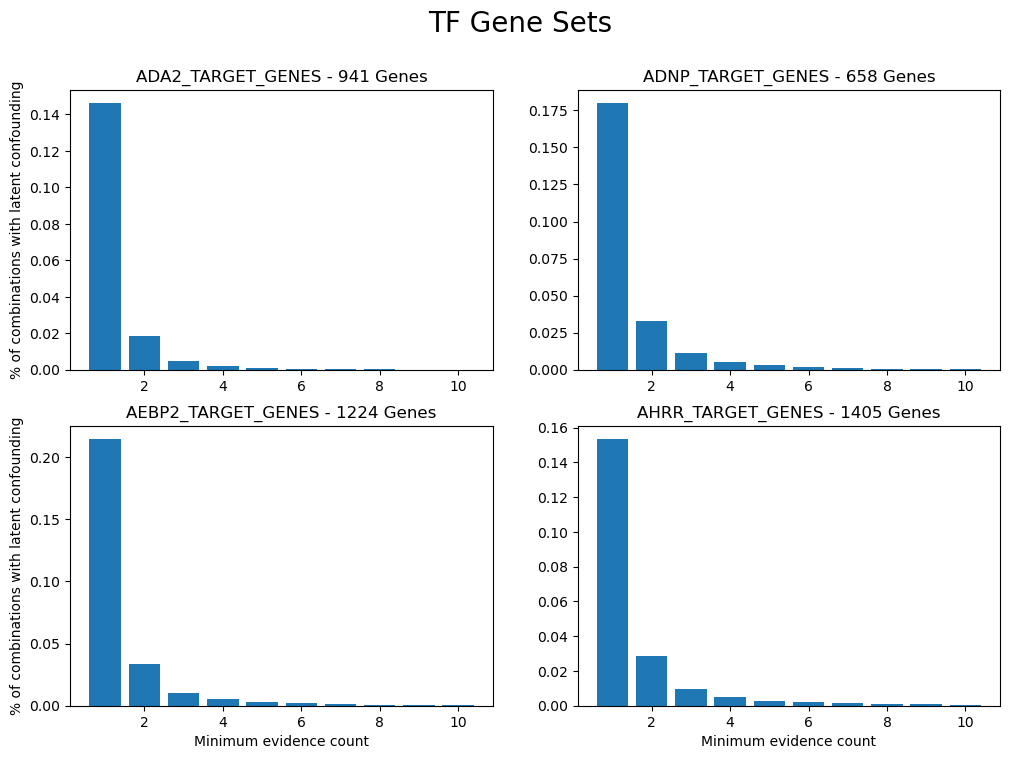

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

ax[0,0].bar(x=np.arange(1,11), height=np.array(confounder_results['ADA2_TARGET_GENES']['confounders'])/
            confounder_results['ADA2_TARGET_GENES']['N_combinations'])
ax[0,1].bar(x=np.arange(1,11), height=np.array(confounder_results['ADNP_TARGET_GENES']['confounders'])/
            confounder_results['ADNP_TARGET_GENES']['N_combinations'])
ax[1,0].bar(x=np.arange(1,11), height=np.array(confounder_results['AEBP2_TARGET_GENES']['confounders'])/
            confounder_results['AEBP2_TARGET_GENES']['N_combinations'])
ax[1,1].bar(x=np.arange(1,11), height=np.array(confounder_results['AHRR_TARGET_GENES']['confounders'])/
            confounder_results['AHRR_TARGET_GENES']['N_combinations'])

ax[0,0].set_title('ADA2_TARGET_GENES - 941 Genes')
ax[0,1].set_title('ADNP_TARGET_GENES - 658 Genes')
ax[1,0].set_title('AEBP2_TARGET_GENES - 1224 Genes')
ax[1,1].set_title('AHRR_TARGET_GENES - 1405 Genes')

ax[0,0].set_ylabel('% of combinations with latent confounding')
ax[1,0].set_ylabel('% of combinations with latent confounding')
ax[1,0].set_xlabel('Minimum evidence count')
ax[1,1].set_xlabel('Minimum evidence count')

plt.suptitle("TF Gene Sets", size=20)

Text(0.5, 0, 'Minimum evidence count')

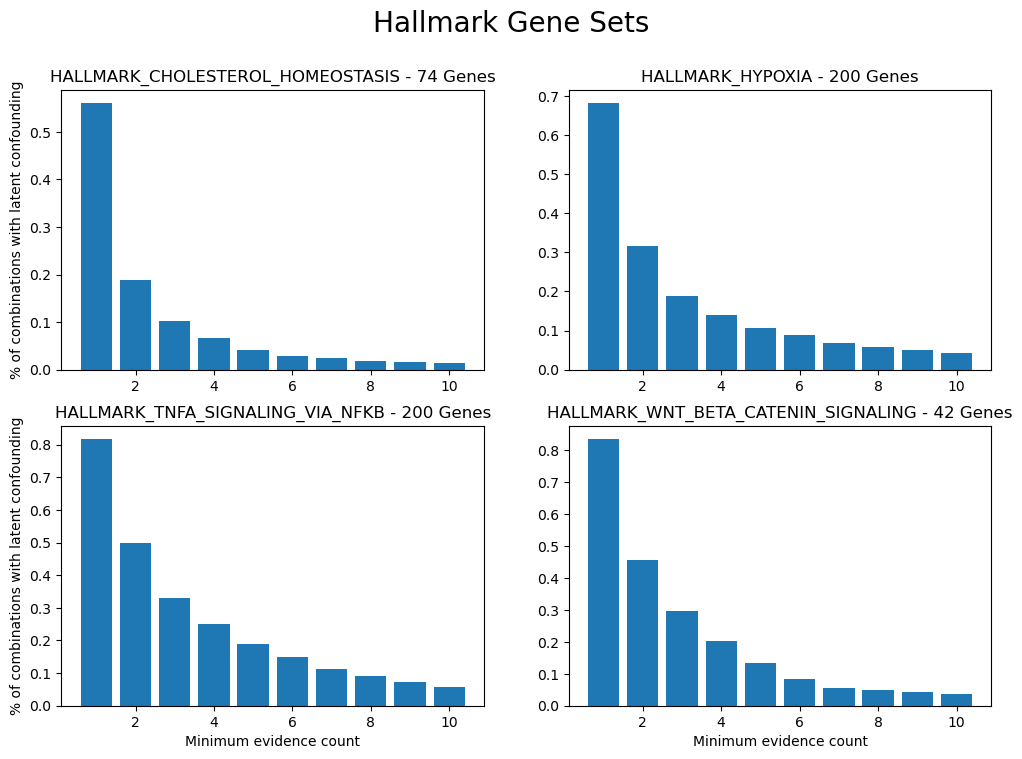

In [51]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

ax[0,0].bar(x=np.arange(1,11), height=np.array(confounder_results['HALLMARK_CHOLESTEROL_HOMEOSTASIS']['confounders'])/
            confounder_results['HALLMARK_CHOLESTEROL_HOMEOSTASIS']['N_combinations'])
ax[0,1].bar(x=np.arange(1,11), height=np.array(confounder_results['HALLMARK_HYPOXIA']['confounders'])/
            confounder_results['HALLMARK_HYPOXIA']['N_combinations'])
ax[1,0].bar(x=np.arange(1,11), height=np.array(confounder_results['HALLMARK_TNFA_SIGNALING_VIA_NFKB']['confounders'])/
            confounder_results['HALLMARK_TNFA_SIGNALING_VIA_NFKB']['N_combinations'])
ax[1,1].bar(x=np.arange(1,11), height=np.array(confounder_results['HALLMARK_WNT_BETA_CATENIN_SIGNALING']['confounders'])/
            confounder_results['HALLMARK_WNT_BETA_CATENIN_SIGNALING']['N_combinations'])

ax[0,0].set_title('HALLMARK_CHOLESTEROL_HOMEOSTASIS - 74 Genes')
ax[0,1].set_title('HALLMARK_HYPOXIA - 200 Genes')
ax[1,0].set_title('HALLMARK_TNFA_SIGNALING_VIA_NFKB - 200 Genes')
ax[1,1].set_title('HALLMARK_WNT_BETA_CATENIN_SIGNALING - 42 Genes')

plt.suptitle("Hallmark Gene Sets", size=20)

ax[0,0].set_ylabel('% of combinations with latent confounding')
ax[1,0].set_ylabel('% of combinations with latent confounding')
ax[1,0].set_xlabel('Minimum evidence count')
ax[1,1].set_xlabel('Minimum evidence count')

In [71]:
direct_results = dict()

files = os.listdir(direct_directory)
for filename in files:
    
    if "HALLMARK" in filename:
        genes = hallmark_gene_sets
    else:
        genes = tf_gene_sets
    
    gene_set = genes[filename.split(".")[0]]["geneSymbols"]
    print(filename)
    print(len(gene_set))
    direct_results[filename.split(".")[0]] = get_direct_summary_stats(
        pd.read_csv(os.path.join(directory, filename), sep="\t"), gene_set, 10)

ADA2_TARGET_GENES.tsv
941
Evidence: 1
Evidence: 2
Evidence: 3
Evidence: 4
Evidence: 5
Evidence: 6
Evidence: 7
Evidence: 8
Evidence: 9
Evidence: 10
ADCYAP1_TARGET_GENES.tsv
12
Evidence: 1
Evidence: 2
Evidence: 3
Evidence: 4
Evidence: 5
Evidence: 6
Evidence: 7
Evidence: 8
Evidence: 9
Evidence: 10
ADNP_TARGET_GENES.tsv
658
Evidence: 1
Evidence: 2
Evidence: 3
Evidence: 4
Evidence: 5
Evidence: 6
Evidence: 7
Evidence: 8
Evidence: 9
Evidence: 10
AEBP2_TARGET_GENES.tsv
1224
Evidence: 1
Evidence: 2
Evidence: 3
Evidence: 4
Evidence: 5
Evidence: 6
Evidence: 7
Evidence: 8
Evidence: 9
Evidence: 10
AHRR_TARGET_GENES.tsv
1405
Evidence: 1
Evidence: 2
Evidence: 3
Evidence: 4
Evidence: 5
Evidence: 6
Evidence: 7
Evidence: 8
Evidence: 9
Evidence: 10
HALLMARK_CHOLESTEROL_HOMEOSTASIS.tsv
74
Evidence: 1
Evidence: 2
Evidence: 3
Evidence: 4
Evidence: 5
Evidence: 6
Evidence: 7
Evidence: 8
Evidence: 9
Evidence: 10
HALLMARK_HYPOXIA.tsv
200
Evidence: 1
Evidence: 2
Evidence: 3
Evidence: 4
Evidence: 5
Evidence: 6
Ev

In [72]:
direct_results

{'ADA2_TARGET_GENES': {'N_genes': 941,
  'direct_edges': [8855, 2179, 911, 530, 347, 251, 186, 142, 106, 79]},
 'ADCYAP1_TARGET_GENES': {'N_genes': 12,
  'direct_edges': [4, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
 'ADNP_TARGET_GENES': {'N_genes': 658,
  'direct_edges': [8766, 2494, 1205, 745, 512, 375, 290, 232, 187, 155]},
 'AEBP2_TARGET_GENES': {'N_genes': 1224,
  'direct_edges': [18154, 5013, 2282, 1370, 959, 697, 530, 407, 324, 270]},
 'AHRR_TARGET_GENES': {'N_genes': 1405,
  'direct_edges': [24079, 7010, 3366, 2075, 1421, 1049, 828, 650, 507, 412]},
 'HALLMARK_CHOLESTEROL_HOMEOSTASIS': {'N_genes': 74,
  'direct_edges': [3430, 1263, 711, 468, 332, 250, 188, 149, 122, 104]},
 'HALLMARK_HYPOXIA': {'N_genes': 200,
  'direct_edges': [18399, 7222, 4089, 2775, 2056, 1598, 1283, 1049, 873, 736]},
 'HALLMARK_MITOTIC_SPINDLE': {'N_genes': 199,
  'direct_edges': [3902, 1061, 506, 309, 213, 150, 114, 79, 66, 50]},
 'HALLMARK_TNFA_SIGNALING_VIA_NFKB': {'N_genes': 200,
  'direct_edges': [29856,
   11408,

Text(0.5, 0.98, 'TF Gene Sets')

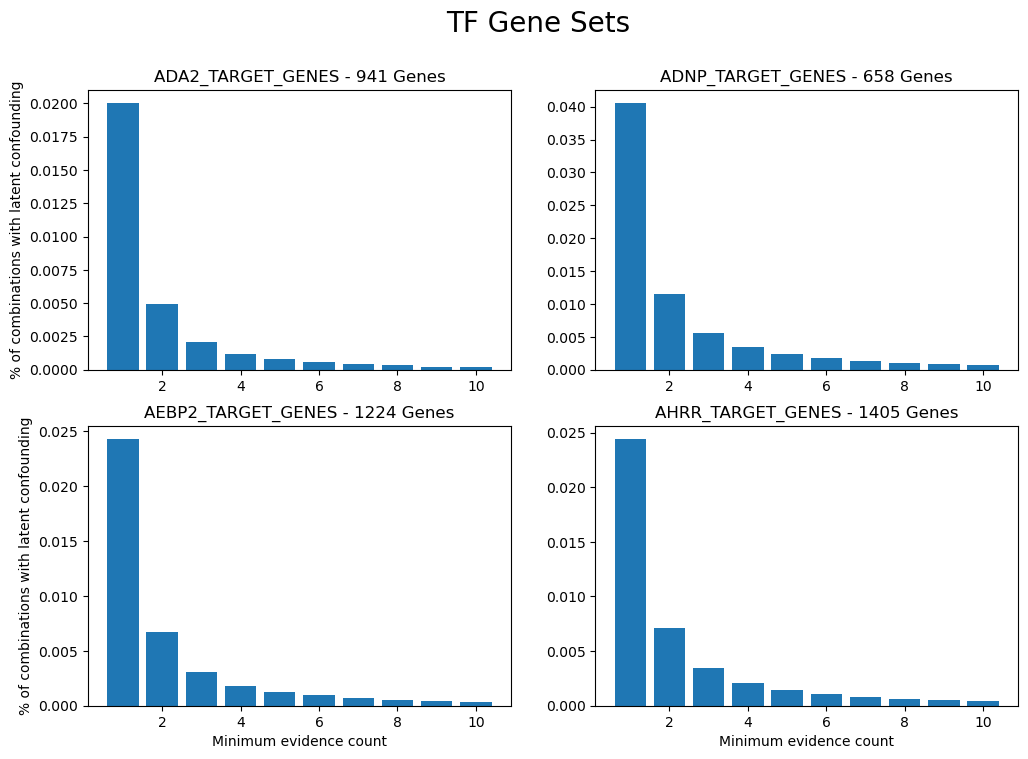

In [76]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

ax[0,0].bar(x=np.arange(1,11), height=np.array(direct_results['ADA2_TARGET_GENES']['direct_edges'])/
            confounder_results['ADA2_TARGET_GENES']['N_combinations'])
ax[0,1].bar(x=np.arange(1,11), height=np.array(direct_results['ADNP_TARGET_GENES']['direct_edges'])/
            confounder_results['ADNP_TARGET_GENES']['N_combinations'])
ax[1,0].bar(x=np.arange(1,11), height=np.array(direct_results['AEBP2_TARGET_GENES']['direct_edges'])/
            confounder_results['AEBP2_TARGET_GENES']['N_combinations'])
ax[1,1].bar(x=np.arange(1,11), height=np.array(direct_results['AHRR_TARGET_GENES']['direct_edges'])/
            confounder_results['AHRR_TARGET_GENES']['N_combinations'])

ax[0,0].set_title('ADA2_TARGET_GENES - 941 Genes')
ax[0,1].set_title('ADNP_TARGET_GENES - 658 Genes')
ax[1,0].set_title('AEBP2_TARGET_GENES - 1224 Genes')
ax[1,1].set_title('AHRR_TARGET_GENES - 1405 Genes')

ax[0,0].set_ylabel('% of combinations with latent confounding')
ax[1,0].set_ylabel('% of combinations with latent confounding')
ax[1,0].set_xlabel('Minimum evidence count')
ax[1,1].set_xlabel('Minimum evidence count')

plt.suptitle("TF Gene Sets", size=20)

In [78]:
direct_results

{'ADA2_TARGET_GENES': {'N_genes': 941,
  'direct_edges': [8855, 2179, 911, 530, 347, 251, 186, 142, 106, 79]},
 'ADCYAP1_TARGET_GENES': {'N_genes': 12,
  'direct_edges': [4, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
 'ADNP_TARGET_GENES': {'N_genes': 658,
  'direct_edges': [8766, 2494, 1205, 745, 512, 375, 290, 232, 187, 155]},
 'AEBP2_TARGET_GENES': {'N_genes': 1224,
  'direct_edges': [18154, 5013, 2282, 1370, 959, 697, 530, 407, 324, 270]},
 'AHRR_TARGET_GENES': {'N_genes': 1405,
  'direct_edges': [24079, 7010, 3366, 2075, 1421, 1049, 828, 650, 507, 412]},
 'HALLMARK_CHOLESTEROL_HOMEOSTASIS': {'N_genes': 74,
  'direct_edges': [3430, 1263, 711, 468, 332, 250, 188, 149, 122, 104]},
 'HALLMARK_HYPOXIA': {'N_genes': 200,
  'direct_edges': [18399, 7222, 4089, 2775, 2056, 1598, 1283, 1049, 873, 736]},
 'HALLMARK_MITOTIC_SPINDLE': {'N_genes': 199,
  'direct_edges': [3902, 1061, 506, 309, 213, 150, 114, 79, 66, 50]},
 'HALLMARK_TNFA_SIGNALING_VIA_NFKB': {'N_genes': 200,
  'direct_edges': [29856,
   11408,

In [79]:
confounder_results['HALLMARK_CHOLESTEROL_HOMEOSTASIS']['N_combinations']

2701

In [80]:
confounder_results

{'ADA2_TARGET_GENES': {'N_genes': 941,
  'N_combinations': 442270,
  'confounders': [64632, 8159, 2007, 948, 399, 211, 129, 67, 22, 13]},
 'ADCYAP1_TARGET_GENES': {'N_genes': 12,
  'N_combinations': 66,
  'confounders': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
 'ADNP_TARGET_GENES': {'N_genes': 658,
  'N_combinations': 216153,
  'confounders': [38889, 7150, 2448, 1152, 656, 384, 224, 132, 87, 70]},
 'AEBP2_TARGET_GENES': {'N_genes': 1224,
  'N_combinations': 748476,
  'confounders': [160494, 24938, 7766, 4025, 2498, 1627, 849, 440, 270, 182]},
 'AHRR_TARGET_GENES': {'N_genes': 1405,
  'N_combinations': 986310,
  'confounders': [151327,
   28098,
   9215,
   4773,
   2863,
   2082,
   1519,
   1056,
   712,
   542]},
 'HALLMARK_CHOLESTEROL_HOMEOSTASIS': {'N_genes': 74,
  'N_combinations': 2701,
  'confounders': [1514, 512, 279, 178, 111, 78, 65, 50, 42, 36]},
 'HALLMARK_HYPOXIA': {'N_genes': 200,
  'N_combinations': 19900,
  'confounders': [13561, 6317, 3762, 2763, 2113, 1769, 1335, 1138, 997, 8

Text(0.5, 0, 'Minimum evidence count')

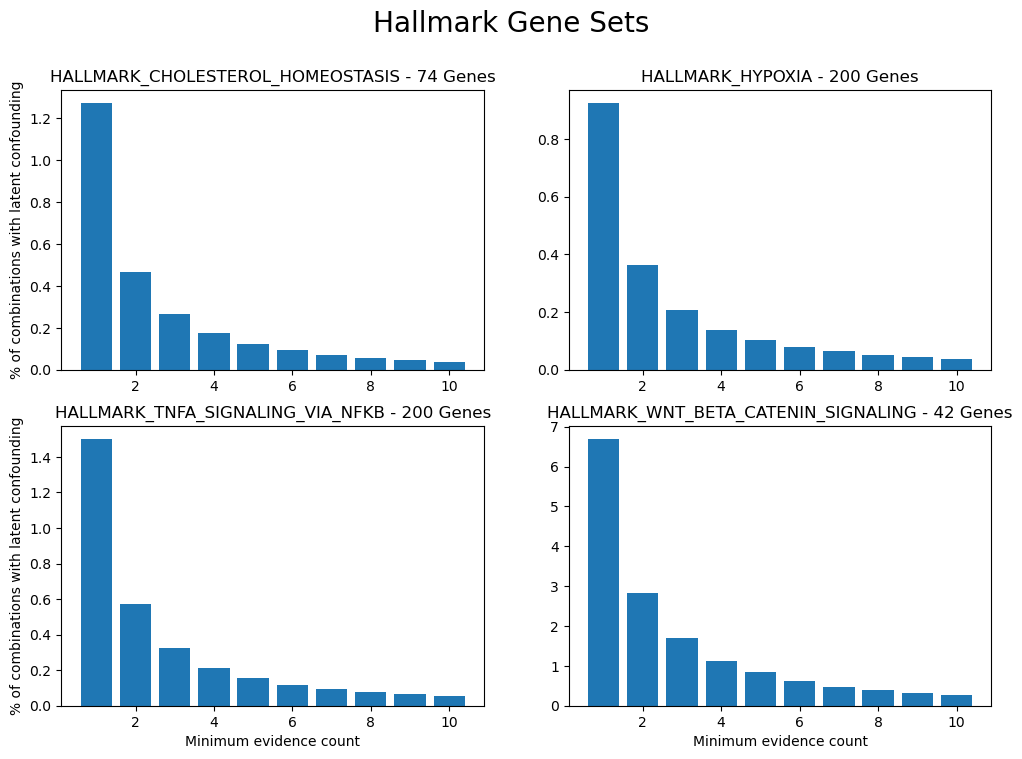

In [77]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

ax[0,0].bar(x=np.arange(1,11), height=np.array(direct_results['HALLMARK_CHOLESTEROL_HOMEOSTASIS']['direct_edges'])/
            confounder_results['HALLMARK_CHOLESTEROL_HOMEOSTASIS']['N_combinations'])
ax[0,1].bar(x=np.arange(1,11), height=np.array(direct_results['HALLMARK_HYPOXIA']['direct_edges'])/
            confounder_results['HALLMARK_HYPOXIA']['N_combinations'])
ax[1,0].bar(x=np.arange(1,11), height=np.array(direct_results['HALLMARK_TNFA_SIGNALING_VIA_NFKB']['direct_edges'])/
            confounder_results['HALLMARK_TNFA_SIGNALING_VIA_NFKB']['N_combinations'])
ax[1,1].bar(x=np.arange(1,11), height=np.array(direct_results['HALLMARK_WNT_BETA_CATENIN_SIGNALING']['direct_edges'])/
            confounder_results['HALLMARK_WNT_BETA_CATENIN_SIGNALING']['N_combinations'])

ax[0,0].set_title('HALLMARK_CHOLESTEROL_HOMEOSTASIS - 74 Genes')
ax[0,1].set_title('HALLMARK_HYPOXIA - 200 Genes')
ax[1,0].set_title('HALLMARK_TNFA_SIGNALING_VIA_NFKB - 200 Genes')
ax[1,1].set_title('HALLMARK_WNT_BETA_CATENIN_SIGNALING - 42 Genes')

plt.suptitle("Hallmark Gene Sets", size=20)

ax[0,0].set_ylabel('% of combinations with latent confounding')
ax[1,0].set_ylabel('% of combinations with latent confounding')
ax[1,0].set_xlabel('Minimum evidence count')
ax[1,1].set_xlabel('Minimum evidence count')